In [1]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.patches as patches
from matplotlib.patches import Arc
import matplotlib.lines as lines
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Angular Motion Variables

- angular displacement $ \Delta\theta = \theta_f - \theta_i $
- angular velocity $ w = \frac{\Delta\theta}{\Delta t} $
- angular acceleration $ \alpha = \frac{\Delta w}{\Delta t} $
- arc length $ S = R \Delta \theta $
- linear velocity $ v = r w $ where $ r w = \frac{R \Delta \theta}{\Delta t} = \frac{S}{\Delta t} $
- tangential acceleration $ a_t = \alpha r $

In [40]:
def draw_circle(ax, radius, origin):
    x,y = origin
    circle = plt.Circle((x, y), radius, color='gray', fill=False, linestyle='dashed')
    return ax.add_artist(circle)

def draw_angle(ax, angle_rad, radius, origin, show_label=False, show_head=False, linestyle='solid'):
    x,y = origin
    head_length = 0.025 if show_head else 0
    dx = (radius - head_length) * math.cos(angle_rad)
    dy = (radius - head_length) * math.sin(angle_rad)
    if show_label:
        label = f"$ R = {radius:.3f}m $"
        label_x = x + radius/1.5 * math.cos(angle_rad)
        label_y = y + radius/1.5 * math.sin(angle_rad)
        ax_label = ax.annotate(label, xy=(label_x,label_y), xytext=(label_x + 0.025, label_y + 0.025), size=12)
        
    return ax.arrow(x, y, dx, dy, head_width=head_length, head_length=head_length, fc='k', ec='k', linestyle=linestyle)
    
def draw_displacement(ax, angle_rad, radius, origin, theta1=0, show_label=False, show_head=False, show_arc=True, linestyle="solid"):
    x,y = origin
    inner_radius = radius
    
    angle = np.rad2deg(angle_rad)
    elements = []
    
    if show_arc:
        arc = Arc((x, y), inner_radius * 2, inner_radius * 2, theta1=theta1, theta2=min(360, np.rad2deg(angle_rad)), linestyle=linestyle)
        elements.append(ax.add_patch(arc))
    
    if show_label:
        label = f"$ \Delta\\theta = \\theta_f - \\theta_i = {angle_rad:.3f} ({angle:.0f}°)$"
        label_x = x + inner_radius * math.cos(angle_rad)
        label_y = y + inner_radius * math.sin(angle_rad)
        elements.append(ax.annotate(label, xy=(label_x,label_y), xytext=(label_x + 0.025, label_y + 0.025), size=12))
    
    if show_head:
        head_length = 0.015
        head_dx = head_length * math.cos(angle_rad + math.pi / 2)
        head_dy = head_length * math.sin(angle_rad + math.pi / 2)
        head_x = x + inner_radius * math.cos(angle_rad) - head_dx
        head_y = y + inner_radius * math.sin(angle_rad) - head_dy
        elements.append(ax.arrow(head_x, head_y, head_dx * 1e-10, head_dy * 1e-10,
                            head_width=head_length, head_length=head_length))
    
    return elements
    
def show_displacement(figure, ax, displacement, pos=(0.5, 0.5), radius=0.3):    
    x, y = pos
    circle = draw_circle(ax, radius, (x,y))
    
    angle_rad, angle_deg = displacement, np.rad2deg(displacement)
    angle0_line = draw_angle(ax, 0, radius, (x,y), linestyle='dashed')
    angle_line = draw_angle(ax, angle_rad, radius, (x,y), show_label=True)
    displacement_elements = draw_displacement(ax, angle_rad, radius / 4, (x,y), show_label=True, show_head=True)
    
    return (circle, angle0_line, angle_line, *displacement_elements)

def draw_particle(ax, position, radius=0.025):
    x,y = position
    particle = patches.Circle((x,y), radius)
    return ax.add_patch(particle)

def draw_labeled_arrow(ax, origin, vector, label_format="", color="black"):
    x,y = origin
    dx,dy = vector
    elements = []
    elements.append(ax.arrow(x, y, dx, dy, head_width=0.015, head_length=0.015, color=color))
    elements.append(ax.annotate(label_format, xy=(x + dx * 0.5, y + dy * 0.5 - 0.025)))
    return elements

def draw_rect(ax, position, width=0.6, height=0.036, angle=0, show_length=True, arrow_length=None):
    if not arrow_length:
        arrow_length = width

    x,y = position
    rect = patches.Rectangle((x, y), width, height, linewidth=1,
                             edgecolor='black', facecolor='none', angle=angle)

    if show_length:
        arrow_dx = np.sin(np.deg2rad(angle + 90)) * (arrow_length - 0.015)
        arrow_dy = -np.cos(np.deg2rad(angle + 90)) * (arrow_length - 0.015)
        draw_labeled_arrow(ax, (x, y), (arrow_dx, arrow_dy), label_format=f"{arrow_length:.3f}m")

    return ax.add_patch(rect)

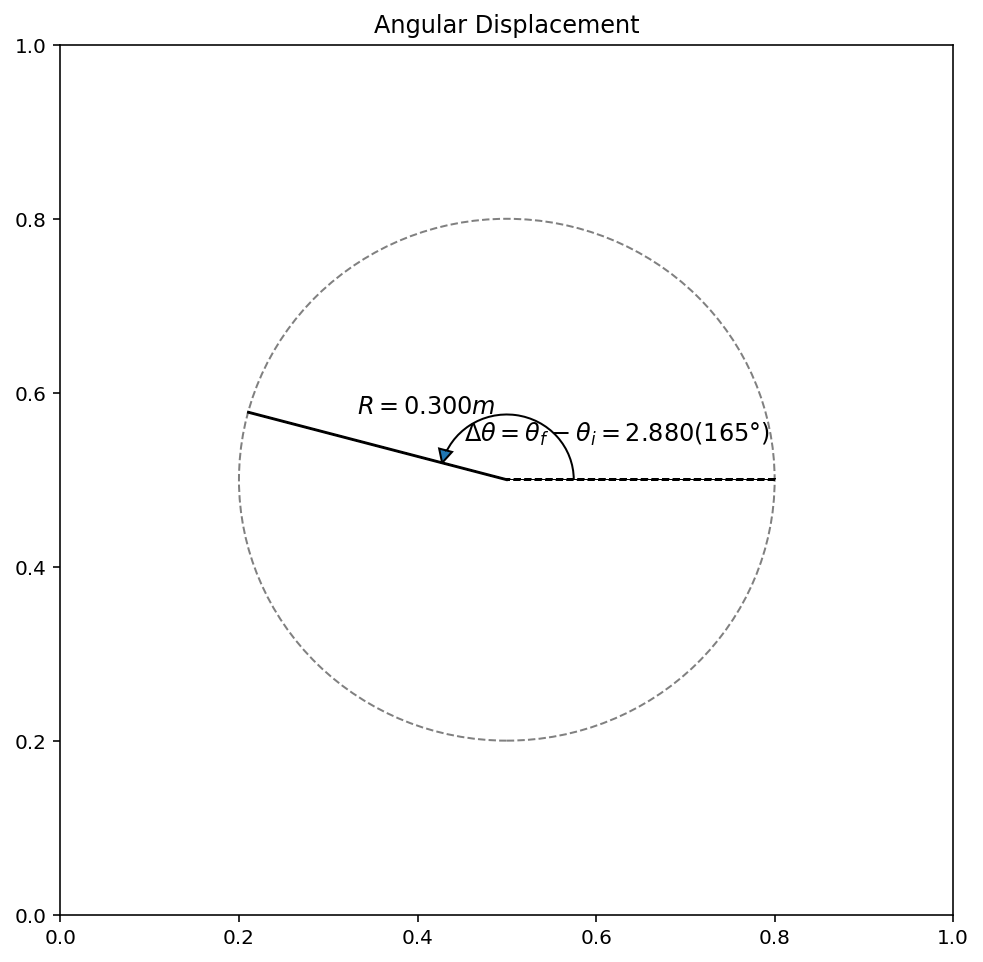

In [3]:
def animate_displacement(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    def init():
        ax.set_title('Angular Displacement')
        return show_displacement(figure, ax, np.deg2rad(45))
    
    def animate(i):
        ax.clear()
        ax.set_title('Angular Displacement')
        return show_displacement(figure, ax, np.deg2rad(45 + i * 5))
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec*5, interval=200, blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_displacement()

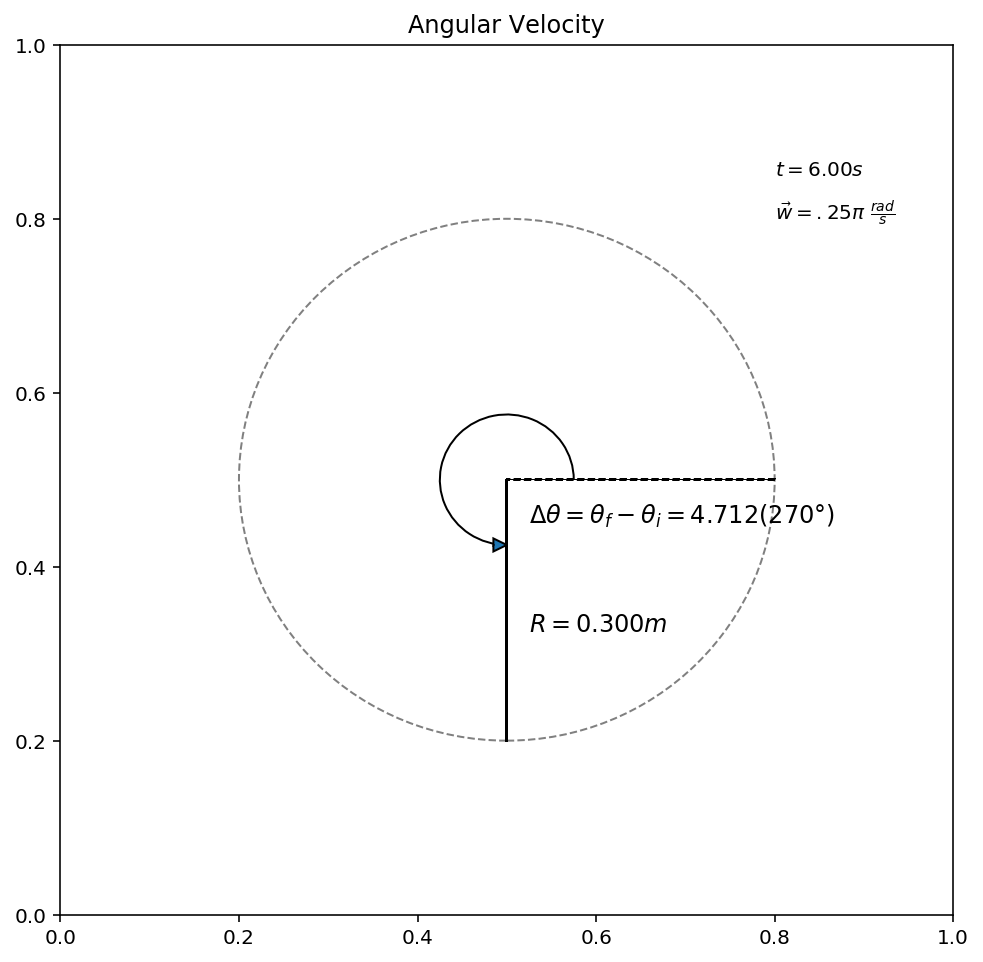

In [4]:
def animate_velocity(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 50
    
    t_0 = 0
    # w (angular velocity, omega) [rad/sec]
    w = .25 * np.pi
    
    def draw_labels(t):
        t_label = f"$ t = {t:.2f}s $"
        w_label = f"$ \\vec{{w}} = .25 \\pi\ \\frac{{rad}}{{s}} $"
        ax.annotate(t_label, xy=(0.8, 0.85))
        ax.annotate(w_label, xy=(0.8, 0.8))
        
    def init():
        ax.set_title('Angular Velocity')
        draw_labels(0)
        return show_displacement(figure, ax, np.deg2rad(45))
    
    def animate(i):        
        ax.clear()
        ax.set_title('Angular Velocity')
        
        t_i = t_0 + (i * interval / 1000)
        d_i = np.rad2deg(w * t_i)
        
        draw_labels(t_i)
        return show_displacement(figure, ax, np.deg2rad(d_i))
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_velocity(6)

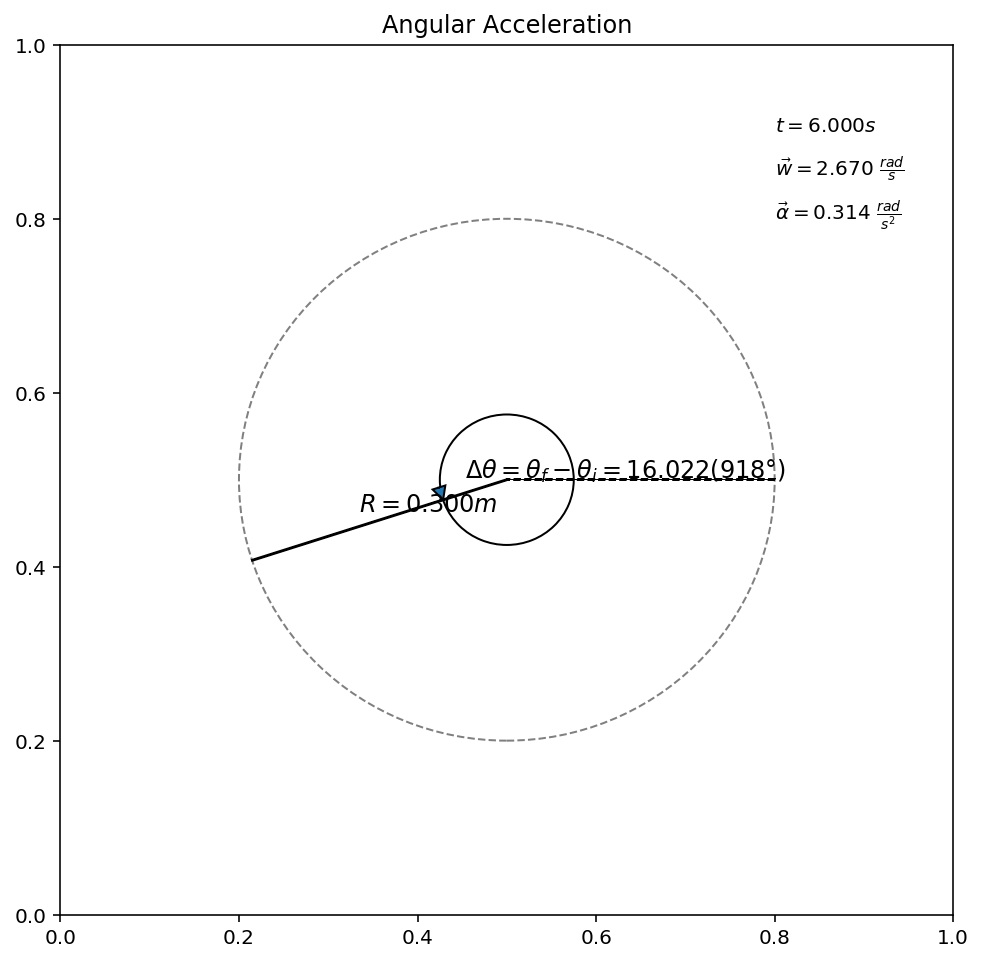

In [5]:
def animate_acceleration(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 50
    
    t_0 = 0
    # displacement [rad]
    d_0 = 0
    # w (angular velocity, omega) [rad/sec]
    w_0 = .25 * np.pi
    # a (angular acceleration, alpha) [rad/sec/sec]
    a = .1 * np.pi
    
    def draw_labels(ax, t, w, d, a):
        t_label = f"$ t = {t:.3f}s $"
        d_label = f"$ \\Delta\\theta = {d:.3f} rad $"
        w_label = f"$ \\vec{{w}} = {w:.3f}\  \\frac{{rad}}{{s}} $"
        a_label = f"$ \\vec{{\\alpha}} = {a:.3f}\  \\frac{{rad}}{{s^2}} $"
        ax.annotate(t_label, xy=(0.8, 0.9))
        ax.annotate(w_label, xy=(0.8, 0.85))
        ax.annotate(a_label, xy=(0.8, 0.8))
    
    def init():
        ax.set_title('Angular Acceleration')
        draw_labels(ax, 0, w_0, d_0, a)
        return show_displacement(figure, ax, np.deg2rad(45))
    
    def animate(i):
        ax.clear()
        ax.set_title('Angular Acceleration')
        
        t = t_0 + (i * interval / 1000)
        w_i = w_0 + a * t
        d_i = np.deg2rad(0 + np.rad2deg(w_i * t))
        
        draw_labels(ax, t, w_i, d_i, a)
        return show_displacement(figure, ax, d_i)
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_acceleration(6)

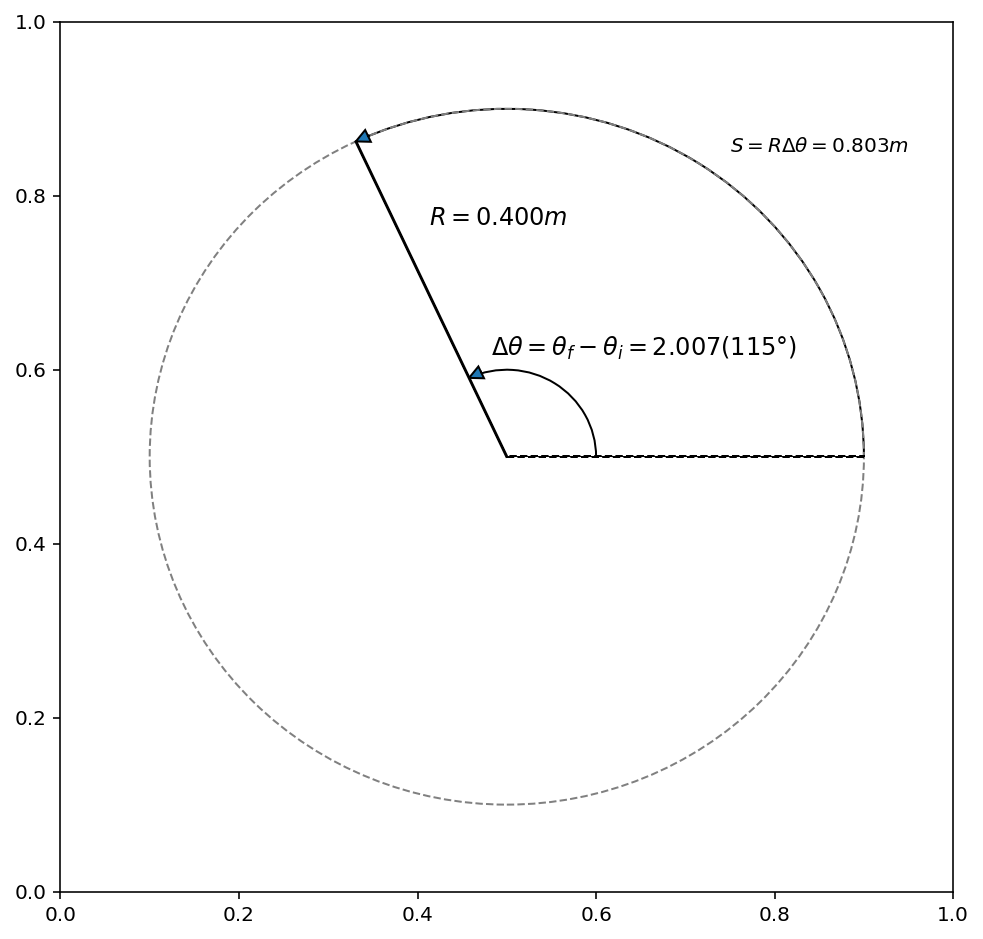

In [6]:
def show_arc_length():
    def draw_labels(ax, d, radius, arc_length):
        S_label = f"$ S = R \\Delta\\theta = {arc_length:.3f}m $"        
        ax.annotate(S_label, xy=(0.75, 0.85))
    
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    radius = .4
    displacement = np.deg2rad(115)
    arc_length = radius * displacement
    
    draw_labels(ax, displacement, radius, arc_length)
    show_displacement(figure, ax, displacement, radius=radius)
    draw_displacement(ax, displacement, radius, (0.5, 0.5), show_head=True)
    
show_arc_length()
    

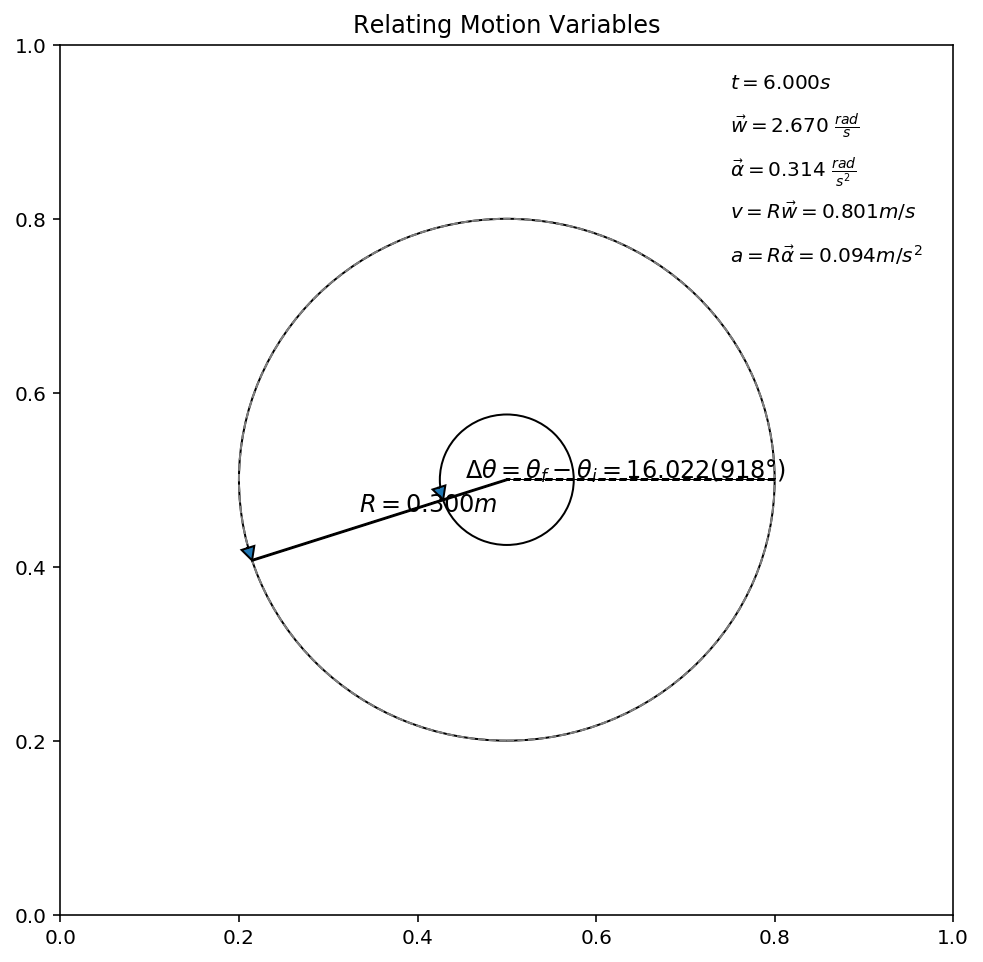

In [7]:
def animate_linear_speed(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 50
    radius = 0.3
    
    t_0 = 0
    # displacement [rad]
    d_0 = 0
    # w (angular velocity, omega) [rad/sec]
    w_0 = .25 * np.pi
    # a (angular acceleration, alpha) [rad/sec/sec]
    a = .1 * np.pi
    
    def draw_labels(ax, t, w, d, a, v, accel):
        t_label = f"$ t = {t:.3f}s $"
        d_label = f"$ \\Delta\\theta = {d:.3f} rad $"
        w_label = f"$ \\vec{{w}} = {w:.3f}\  \\frac{{rad}}{{s}} $"
        a_label = f"$ \\vec{{\\alpha}} = {a:.3f}\  \\frac{{rad}}{{s^2}} $"
        v_label = f"$ v = R \\vec{{w}} = {v:.3f} m/s $"
        accel_label = f"$ a = R \\vec{{\\alpha}} = {accel:.3f} m/s^2 $"
        ax.annotate(t_label, xy=(0.75, 0.95))
        ax.annotate(w_label, xy=(0.75, 0.9))
        ax.annotate(a_label, xy=(0.75, 0.85))
        ax.annotate(v_label, xy=(0.75, 0.8))
        ax.annotate(accel_label, xy=(0.75, 0.75))
    
    def init():
        ax.set_title('Relating Motion Variables')
        draw_labels(ax, 0, w_0, d_0, a, 0, radius * a)
        return show_displacement(figure, ax, np.deg2rad(45))
    
    def animate(i):
        ax.clear()
        ax.set_title('Relating Motion Variables')
        
        # angular variables
        t = t_0 + (i * interval / 1000)
        w_i = w_0 + a * t
        d_i = np.deg2rad(0 + np.rad2deg(w_i * t))
        
        # linear variables
        speed = radius * w_i
        accel = radius * a
        
        draw_labels(ax, t, w_i, d_i, a, speed, accel)
        elements = show_displacement(figure, ax, d_i, radius=radius)
        draw_displacement(ax, d_i, radius, (0.5, 0.5), show_head=True)
        return elements
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_linear_speed(6)

## Angular Kinematics Formulas

- $ w = w_0 + \alpha t $
- $ \theta = \theta_0 + w_0 t + \frac{1}{2}\alpha t^2 $
- $ w^2 = w_0^2 + 2 \alpha (\theta - \theta_0) $
- $ \theta - \theta_0 = \frac{1}{2}(w_0 + w) t $
- where:
    - $ \theta_0 $ is the initial angle
    - $ \theta $ is the final angle
    - $ t $ is the time interval
    - $ w_0 $ is the initial angular velocity
    - $ w $ is the final angular velocity
    - $ \alpha $ is angular acceleration

## Torque and Equilibrium

- $ {\rm T} = F d $

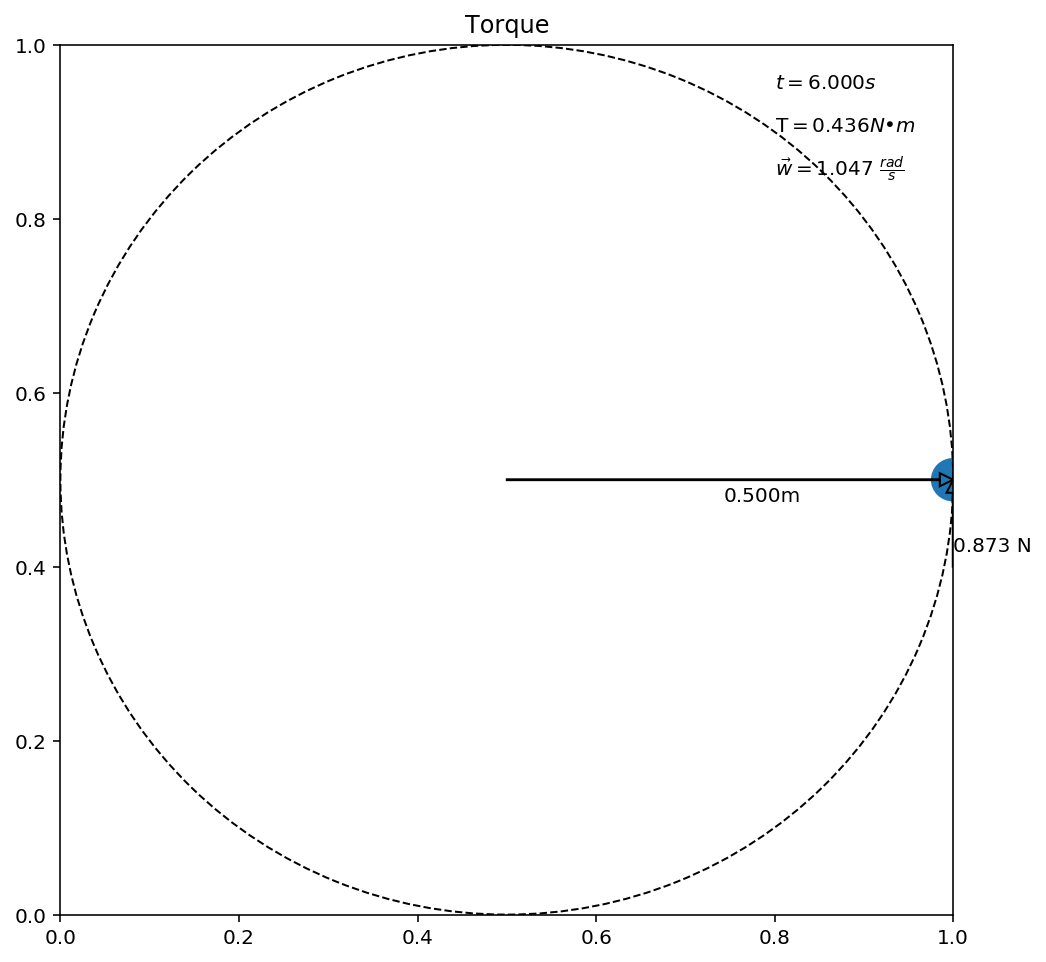

In [8]:
def animate_acceleration(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 50
    
    t_0 = 0
    # displacement [rad]
    d_0 = 0
    # w (angular velocity, omega) [rad/sec]
    w_0 = 0
    # a (angular acceleration, alpha) [rad/sec/sec]
    a = 0
    
    rect_origin = (0.5, 0.5)
    rect_height = 1e-10
    rect_length = 0.5
    rect_mass = 0
    
    particle_mass = 10
    
    # in meters
    torque_length = rect_length
    # in N
    torque_force = 2.5 / 9 * np.pi
    # torque in N•m
    torque = torque_length * torque_force
    
    def draw_labels(ax, t, torque, w):
        t_label = f"$ t = {t:.3f}s $"
        T_label = f"$ {{\\rm T}} = {torque:.3f} N•m $"
        w_label = f"$ \\vec{{w}} = {w:.3f}\  \\frac{{rad}}{{s}} $"
        ax.annotate(t_label, xy=(0.8, 0.95))
        ax.annotate(T_label, xy=(0.8, 0.9))
        ax.annotate(w_label, xy=(0.8, 0.85))
    
    def draw_torque(ax, origin, width, angle, torque):
        x,y = origin
        # the location the torque is being applied on the rect
        torque_x = x + np.sin(np.deg2rad(angle + 90)) * width
        torque_y = y - np.cos(np.deg2rad(angle + 90)) * width
        
        arrow_x = torque_x + np.sin(np.deg2rad(angle)) * 0.1
        arrow_y = torque_y - np.cos(np.deg2rad(angle)) * 0.1
        arrow_dx = -np.sin(np.deg2rad(angle)) * (0.1 - 0.015)
        arrow_dy = np.cos(np.deg2rad(angle)) * (0.1 - 0.015)
        
        return draw_labeled_arrow(ax, (arrow_x, arrow_y), (arrow_dx, arrow_dy), label_format=f"{torque:.3f} N")
    
    def init():
        ax.set_title('Torque')
        draw_labels(ax, 0, torque, w_0)
        draw_rect(ax, rect_origin, width=rect_length, height=rect_height, 
                  angle=0, arrow_length=torque_length)
        return draw_torque(ax, rect_origin, torque_length, 0, torque_force)
    
    def animate(i):
        ax.clear()
        ax.set_title('Torque')
        
        t = t_0 + (i * interval / 1000)
        
        I = particle_mass * pow(rect_length, 2)
        angular_accel = torque / I
        
        w_i = w_0 + angular_accel * t + a * t
        d_i = np.deg2rad(0 + np.rad2deg(w_i * t))
        
        particle_x = rect_origin[0] + np.sin(np.deg2rad(np.rad2deg(d_i) + 90)) * rect_length
        particle_y = rect_origin[1] - np.cos(np.deg2rad(np.rad2deg(d_i) + 90)) * rect_length
        draw_particle(ax, (particle_x, particle_y), 0.025)
        
        draw_labels(ax, t, torque, w_i)
        draw_rect(ax, rect_origin, width=rect_length, height=rect_height, 
                  angle=np.rad2deg(d_i), arrow_length=rect_length)
        
        draw_displacement(ax, d_i, rect_length, (0.5, 0.5), linestyle="dashed")
        
        return draw_torque(ax, rect_origin, rect_length, np.rad2deg(d_i), torque_force)
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_acceleration(6)

## Rotational Kinetic Energy

- $ K_{rot} = \frac{1}{2} I w^2 $

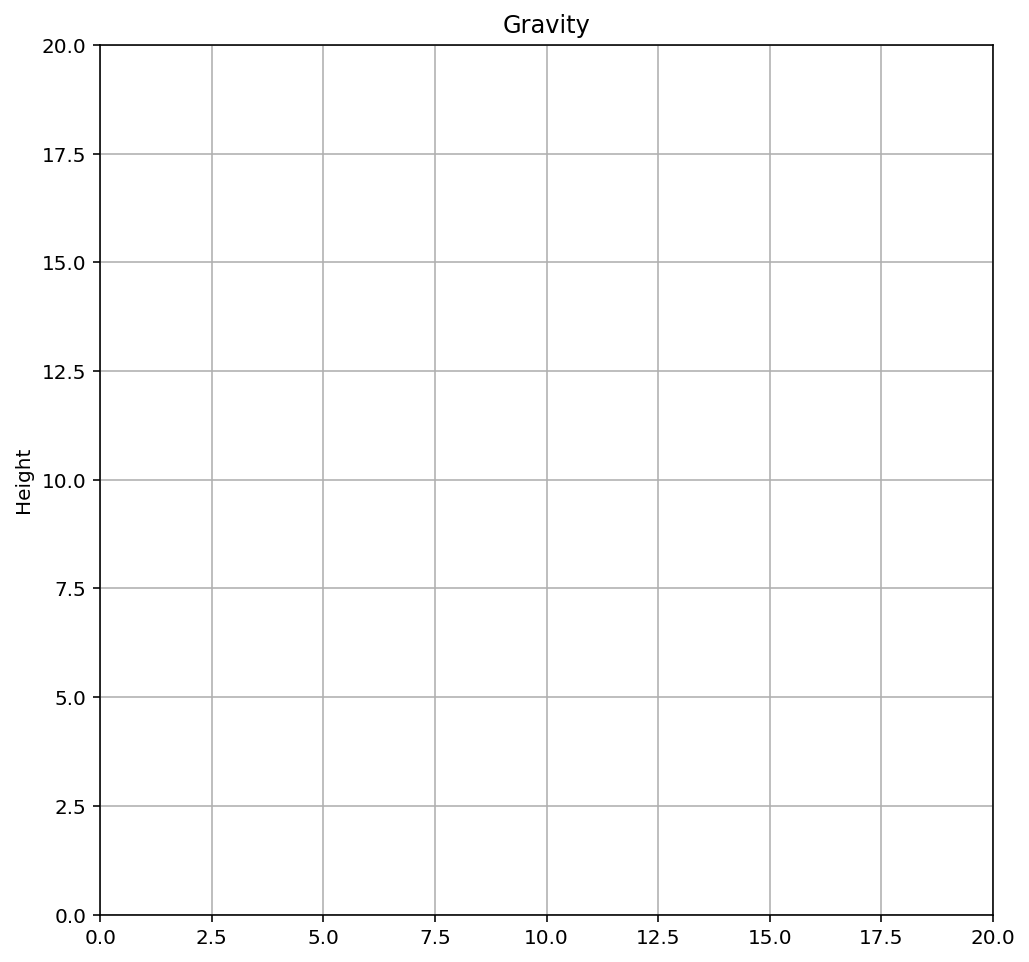

In [13]:
def animate_gravity(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 25
    
    t_0 = 0
    g = 9.80665
    positions_0 = [
        (10, 18),
        (15, 13),
        (3, 17)
    ]
        
    def setup_axes(ax):
        ax.clear()
        ax.set_title('Gravity')
        ax.grid(True)
        ax.set_ylabel('Height')
        ax.set_ylim(0, 20)
        ax.set_xlim(0, 20)
    
    def init():
        setup_axes(ax)
        return [draw_particle(ax, pos, 0.5) for pos in positions_0]
    
    def animate(i):
        setup_axes(ax)
        
        t = t_0 + (i * interval / 1000)
        positions = [(pos[0], pos[1] + -g * t**2) for pos in positions_0]
        
        return [draw_particle(ax, pos, 0.5) for pos in positions]
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_gravity(2)

## Pendulum Motion

- $ \vec{F}_{net} = m \vec{g} - k ( \vec{r} - R \hat{r}) $
- where:
  - $ g $ is the gravitational field vector
  - $ r $ is the vector from the pivot to the bob
  - $ R $ is the length of the connecting spring
  - $ k $ is the spring constant
- $ \vec{p}_2 = \vec{p}_1 + \vec{F}_{net} \Delta t $
- $ \vec{r}_2 = \vec{r}_1 + \frac{ \vec{p} }{m} \Delta t $

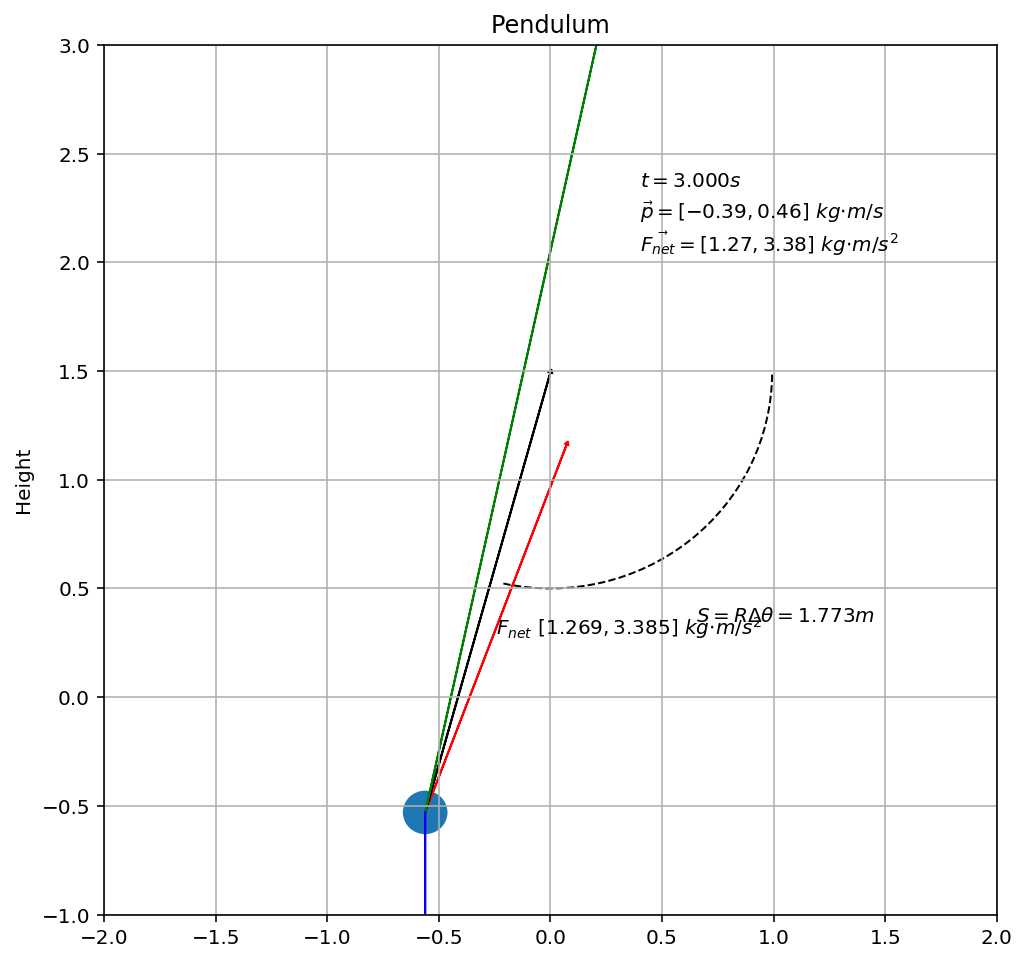

In [114]:
def animate_pendulum(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 25
    
    t_0 = 0
    dt = interval / 1000
    g = np.array([0, -9.80665 * 2.5])
    m = 0.1
    k = 5
    R = .99314
    pivot_pos = np.array([0, 0.5 + R])
    pos_0 = np.array([R, 0.5 + R])
    p_0 = np.array([0, 0])
    particle_size = 0.1
    
    last_pos = pos_0
    last_p = p_0
    
    def draw_labels(ax, t, p, f_net, arc_length):
        t_label = f"$ t = {t:.3f}s $"
        p_label = f"$ \\vec{{p}} = [{p[0]:.2f},{p[1]:.2f}]\ kg⋅m/s $"
        f_label = f"$ \\vec{{F_{{net}}}} = [{f_net[0]:.2f},{f_net[1]:.2f}]\ kg⋅m/s^2 $"
        s_label = f"$ S = R \\Delta\\theta = {arc_length:.3f}m $"
        ax.annotate(t_label, xy=(0.4, 2.35))
        ax.annotate(p_label, xy=(0.4, 2.2))
        ax.annotate(f_label, xy=(0.4, 2.05))
        ax.annotate(s_label, xy=(0.65, 0.35))
        
    def setup_axes(ax):
        ax.clear()
        ax.set_title('Pendulum')
        ax.grid(True)
        ax.set_ylabel('Height')
        ax.set_ylim(-1, 3)
        ax.set_xlim(-2, 2)
    
    def init():
        setup_axes(ax)
        return [draw_particle(ax, pos_0, particle_size)]
    
    def animate(i):
        nonlocal last_pos
        nonlocal last_p
        setup_axes(ax)
        
        t_i = t_0 + (i * interval / 1000)
        r_vec = last_pos - pivot_pos
        r_hat = r_vec / (r_vec**2).sum()**0.5
        F_net = m * g - k * (r_vec - R * r_hat)
        p_i = last_p + F_net * dt
        pos_i = last_pos + (p_i/m) * dt

        last_p = p_i
        last_pos = pos_i
        
        theta = np.abs(np.math.atan2(np.linalg.det([r_vec, [0, -1]]), np.dot(r_vec, [0, -1])) + np.pi/2)
        arc_length = R * theta
        
        draw_displacement(ax, 0, R, pivot_pos, theta1=np.rad2deg(-theta), linestyle="dashed")
        draw_labeled_arrow(ax, pos_i, 0.5 * F_net, label_format=f"$ F_{{net}}\ [{F_net[0]:.3f},{F_net[1]:.3f}]\ kg⋅m/s^2 $", color="r")
        draw_labeled_arrow(ax, pos_i, pivot_pos - last_pos, label_format="")
        draw_labeled_arrow(ax, pos_i, -k * (r_vec - R * r_hat), color="g")
        draw_labeled_arrow(ax, pos_i, m*g, color="b")
        draw_labels(ax, t_i, last_p, F_net, arc_length)
        
        return [draw_particle(ax, pos_i, particle_size)]
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_pendulum(3)